In [95]:
import trusspy as tp
import numpy as np
import pandas as pd


In [96]:
M = tp.Model()


 _____                  ______      
|_   _|                 | ___ \     
  | |_ __ _   _ ___ ___ | |_/ /   _ 
  | | '__| | | / __/ __||  __/ | | |
  | | |  | |_| \__ \__ \| |  | |_| |
  \_/_|   \__,_|___/___/\_|   \__, |
                               __/ |
                              |___/ 

TrussPy - Truss Solver for Python
          Version 1.0.3

Dutzler Andreas, Graz University of Technology, 2023
        

# Initialize Model
* loading Managers

    - finished.



In [97]:
element_type   = 1    # truss
material_type  = 1    # linear-elastic

L1 = 1
L2 = 1
L3 = 1

In [98]:
E = 200*(10**9)

area  = 10**-4

F1 = 10**5
F2 = -(10**5)
F3 = 0

In [99]:
with M.Nodes as MN: # Nodes positions
    MN.add_node( 1, coord=(0,    0,  0))
    MN.add_node( 2, coord=(0,    0,  L1))
    MN.add_node( 3, coord=(L2,   0,  0))
    MN.add_node( 4, coord=(L2,   0,  L1))
    MN.add_node( 5, coord=(L2+L3,0,  0))



In [100]:
with M.Elements as ME:
    ME.add_element( 1, conn=(1,3), gprop=[area] )
    ME.add_element( 2 ,conn=(1,4), gprop=[area] )
    ME.add_element( 3, conn=(2,3), gprop=[area] )
    ME.add_element( 4, conn=(2,4), gprop=[area] )
    ME.add_element( 5, conn=(3,4), gprop=[area] )
    ME.add_element( 6, conn=(3,5), gprop=[area] )
    ME.add_element( 7, conn=(4,5), gprop=[area] )

    ME.assign_etype(    'all',   element_type   ) #element_type   = 1  truss
    ME.assign_mtype(    'all',  material_type   ) #material_type  = 1  linear-elastic
    ME.assign_material( 'all', [E] ) # Função que define o módulo de Elasticidade das barras


In [101]:
with M.Boundaries as MB:
    MB.add_bound_U( 1, (0,0,0) )
    MB.add_bound_U( 2, (0,0,0) )
    MB.add_bound_U( 3, (1,0,1) )
    MB.add_bound_U( 4, (1,0,1) )
    MB.add_bound_U( 5, (1,0,1) )


In [102]:
with M.ExtForces as MF:
    MF.add_force( 5, (F1, F3, F2) )

In [103]:
M.ExtForces.forces

array([[ 100000.,       0., -100000.]])

In [104]:
M.Settings.incs = 1

In [105]:
M.build()
M.run()


# Model Summary
    Analysis Dimension      "ndim": 3
    Number of Nodes       "nnodes": 5
    Number of Elements    "nelems": 7
 
    System DOF              "ndof": 15
    active DOF             "ndof1": 6
    locked DOF             "ndof2": 9
 
    active DOF          "nproDOF1": [ 6  8  9 11 12 14]
    fixed  DOF          "nproDOF0": [ 0  1  2  3  4  5  7 10 13]
\pagebreak
 
# Run Simulation

## Summary of Analysis Parameters
|Description                          |Parameter|Value|
|:------------------------------------|:--------|:--|
|Maximum increments                   |   `incs`| 1 |
|Maximum increment recycles           |   `cycl`| 4 |
|Maximum Newton-Rhapson iterations    |   `nfev`| 8 |
|Maximum incremental displacement     |     `du`| 0.02 |
|Maximum incremental LPF              |   `dlpf`| 0.02 |
|Initial control component            |     `j0`| LPF|
|Locked control component             |`j_fixed`| False |
|Maximum incremental overshoot        |  `dxtol`| 1.000001 |
|Tol

(<Figure size 800x600 with 1 Axes>,
 <AxesSubplot: xlabel='Displacement Z', ylabel='Force Z'>)

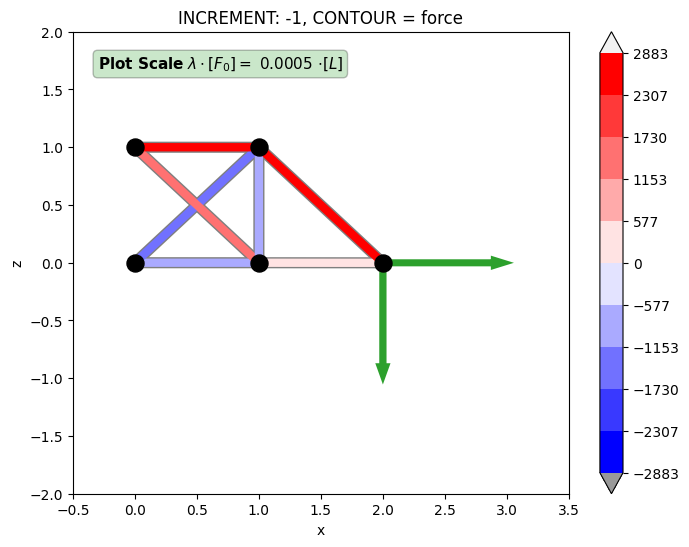

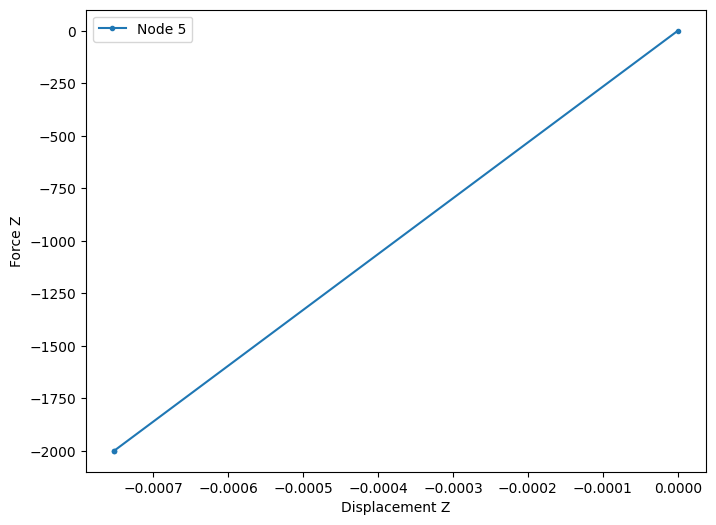

In [106]:
M.plot_model(config=['deformed'],
             view='xz',
             contour='force',
             lim_scale=(-0.5,3.5,-2,2),
             force_scale=1/2000,
             inc=-1)

M.plot_history(nodes=[5,5], X='Displacement Z', Y='Force Z')

In [107]:
# show results
M.plot_movie(config=['deformed'],
             view='xz',
             contour='force',
             lim_scale=(-0.5,3.5,-2,2),
             force_scale=5,
             cbar_limits=[-1,1])

M.Results.R[-1].U[-1]


array([-5.57997435e-05,  0.00000000e+00, -7.51767552e-04])

In [109]:
#y = deslocamento x, y, z
#x = força

#class trelica:
#    def __init__

#como criar um data frame
#como adicionar linhas em uma coluna
#como remover uma coluna
#como multiplicar uma coluna
# pd.get_dummies  (pra separar variáveis categóricas)



